In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



In [10]:

pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 2.0 MB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 1.9 MB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn]0m 3/4 [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [12]:
# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add bias term (intercept)
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [17]:
class LinearRegression:
    def __init__(self):
        self.theta = None
    
    def fit(self, X, y):
        # Normal equation: θ = (XᵀX)⁻¹Xᵀy
        self.theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        return self
    
    def predict(self, X):
        return X.dot(self.theta)

_IncompleteInputError: incomplete input (3576488412.py, line 1)

In [18]:
class LassoRegression:
    def __init__(self, alpha=1.0, max_iter=1000, tol=1e-4):
        self.alpha = alpha
        self.max_iter = max_iter
        self.tol = tol
        self.theta = None
    
    def fit(self, X, y):
        n_features = X.shape[1]
        self.theta = np.zeros(n_features)
        
        for _ in range(self.max_iter):
            theta_old = self.theta.copy()
            
            for j in range(n_features):
                # Coordinate descent for L1
                X_j = X[:, j]
                rho = X_j.dot(y - X.dot(self.theta) + self.theta[j] * X_j)
                if rho < -self.alpha:
                    self.theta[j] = rho - self.alpha
                elif rho > self.alpha:
                    self.theta[j] = rho + self.alpha
                else:
                    self.theta[j] = 0
            
            if np.sum(np.abs(self.theta - theta_old)) < self.tol:
                break
        return self
    
    def predict(self, X):
        return X.dot(self.theta)

In [19]:
class RidgeRegression:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.theta = None
    
    def fit(self, X, y):
        # Ridge: θ = (XᵀX + αI)⁻¹Xᵀy
        n_features = X.shape[1]
        I = np.eye(n_features)
        I[0, 0] = 0  # Don't regularize intercept
        self.theta = np.linalg.inv(X.T.dot(X) + self.alpha * I).dot(X.T).dot(y)
        return self
    
    def predict(self, X):
        return X.dot(self.theta)

In [20]:
# Train all models
models = {
    'Linear': LinearRegression().fit(X_train_b, y_train),
    'Lasso (α=1)': LassoRegression(alpha=1.0).fit(X_train_b, y_train),
    'Lasso (α=10)': LassoRegression(alpha=10.0).fit(X_train_b, y_train),
    'Ridge (α=1)': RidgeRegression(alpha=1.0).fit(X_train_b, y_train),
    'Ridge (α=10)': RidgeRegression(alpha=10.0).fit(X_train_b, y_train)
}

/var/folders/p7/svrl7d791kn2fr6t6_5h84w40000gn/T/ipykernel_46294/3149476603.py:18: RuntimeWarning: overflow encountered in dot
  rho = X_j.dot(y - X.dot(self.theta) + self.theta[j] * X_j)
/var/folders/p7/svrl7d791kn2fr6t6_5h84w40000gn/T/ipykernel_46294/3149476603.py:18: RuntimeWarning: invalid value encountered in dot
  rho = X_j.dot(y - X.dot(self.theta) + self.theta[j] * X_j)
/var/folders/p7/svrl7d791kn2fr6t6_5h84w40000gn/T/ipykernel_46294/3149476603.py:18: RuntimeWarning: invalid value encountered in add
  rho = X_j.dot(y - X.dot(self.theta) + self.theta[j] * X_j)
/var/folders/p7/svrl7d791kn2fr6t6_5h84w40000gn/T/ipykernel_46294/3149476603.py:18: RuntimeWarning: overflow encountered in multiply
  rho = X_j.dot(y - X.dot(self.theta) + self.theta[j] * X_j)


In [21]:
# Evaluate
print("Model Performance:")
print("=" * 50)
for name, model in models.items():
    y_pred_train = model.predict(X_train_b)
    y_pred_test = model.predict(X_test_b)
    
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    
    print(f"{name:15} | Train MSE: {train_mse:8.2f} | Test MSE: {test_mse:8.2f}")
    
    # Show coefficients (feature importance)
    if hasattr(model, 'theta'):
        non_zero = np.sum(model.theta[1:] != 0)  # Exclude intercept
        print(f"                   | Non-zero features: {non_zero}/5")

Model Performance:
Linear          | Train MSE:    81.58 | Test MSE:   113.45
                   | Non-zero features: 5/5
Lasso (α=1)     | Train MSE: 11914342908048714987730130611572283277274531719987643639460507290584583353015938975358072572966830565402911324253201393815145300288268664832.00 | Test MSE: 14953743133215254549522651881644602561222836440503126510820206065142463833366975714936175958707123454825443085666329771593856383695546482688.00
                   | Non-zero features: 5/5
Lasso (α=10)    | Train MSE: 11986796621310426430066553978149806865819713437394149569632927862076937805067788269898662472788355479025394964225890959966823706432045580288.00 | Test MSE: 15044680100996441103843586647773261306273364893140685347867317239590655283030942913198828269625708995765823714779440624321853416587067916288.00
                   | Non-zero features: 5/5
Ridge (α=1)     | Train MSE:    85.48 | Test MSE:   121.65
                   | Non-zero features: 5/5
Ridge (α=10)    | Train MSE: 

In [22]:
from sklearn.linear_model import LinearRegression as SkLinear, Lasso, Ridge
from sklearn.preprocessing import StandardScaler

# Standardize features (important for regularization!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add intercept manually for consistency
X_train_scaled_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_scaled_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

# Sklearn models
sk_models = {
    'Sklearn Linear': SkLinear().fit(X_train, y_train),
    'Sklearn Lasso (α=1)': Lasso(alpha=1.0, max_iter=1000).fit(X_train_scaled, y_train),
    'Sklearn Lasso (α=10)': Lasso(alpha=10.0, max_iter=1000).fit(X_train_scaled, y_train),
    'Sklearn Ridge (α=1)': Ridge(alpha=1.0).fit(X_train_scaled, y_train),
    'Sklearn Ridge (α=10)': Ridge(alpha=10.0).fit(X_train_scaled, y_train)
}

print("\nSklearn Model Performance:")
print("=" * 50)
for name, model in sk_models.items():
    if 'Linear' in name:
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
    else:
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)
    
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    
    print(f"{name:20} | Train MSE: {train_mse:8.2f} | Test MSE: {test_mse:8.2f}")


Sklearn Model Performance:
Sklearn Linear       | Train MSE:    81.58 | Test MSE:   113.45
Sklearn Lasso (α=1)  | Train MSE:    86.54 | Test MSE:   118.30
Sklearn Lasso (α=10) | Train MSE:   577.42 | Test MSE:   565.30
Sklearn Ridge (α=1)  | Train MSE:    84.68 | Test MSE:   120.52
Sklearn Ridge (α=10) | Train MSE:   329.90 | Test MSE:   403.59


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [34]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns= data.feature_names)
y = data.target

In [36]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [51]:
lr=LinearRegression()

In [52]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
y_pred = lr.predict(X_test)

In [59]:
rmse = mean_squared_error(y_test, y_pred)
print(f"rmse = {rmse:.4f}" )

rmse = 0.5559


In [62]:
r2 = r2_score(y_test,y_pred)
print(f"r2  = {r2:.4f}")


r2  = 0.5758


In [63]:

print("Coefficients:", lr.coef_)
print("Intercept:   ", lr.intercept_)

Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Intercept:    -37.02327770606412


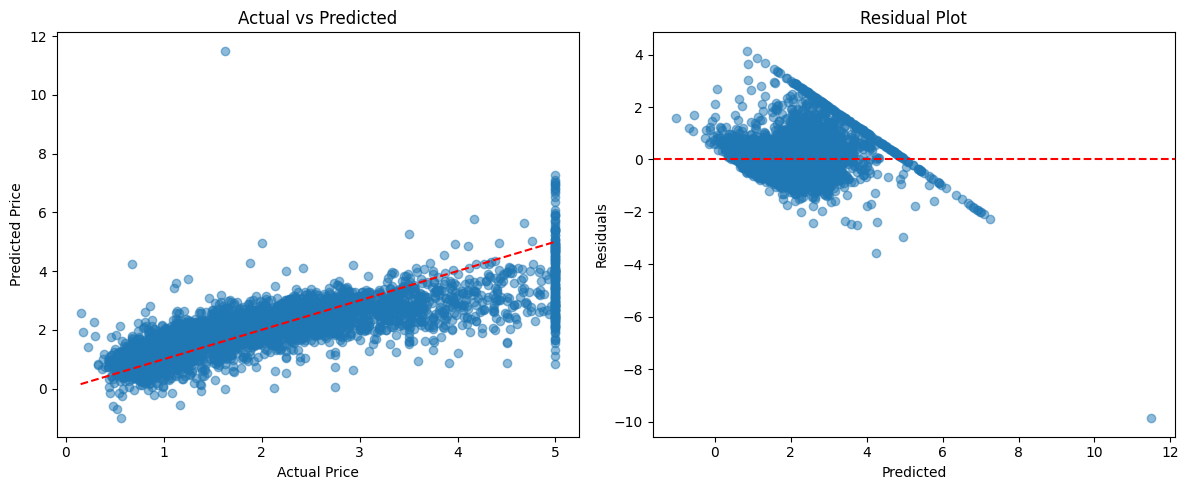

In [66]:
# CELL 7 – Beautiful plots
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")

plt.subplot(1,2,2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")

plt.tight_layout()
plt.show()